<a href="https://colab.research.google.com/github/HARISHREDDYCHILUMULA/ML_Projects/blob/main/Customer%20Segmentation%20using%20K-Means%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer** **Segmentation**

In this Machine Learning project I've collected the dataset from [Kaggle](https://www.kaggle.com/datasets/shwetabh123/mall-customers) and I will be using **K-Means Clustering** to segment group of people who visit a Mall based on their income.

# **Importing Libraries**

Let's first import all the necessary Libraries required for the project :  

**Numpy** :- It is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.

**Pandas** :- It is a Python package that offers various data structures and operations for manipulating numerical data and time series. It is mainly popular for importing and analyzing data much easier. Pandas is fast and it has high-performance & productivity for users.

**Matplotlib** :- It is an amazing visualization library in Python for 2D plots of arrays. Matplotlib is a multi-platform data visualization library built on NumPy arrays.

**Seaborn** :- It is an amazing visualization library for statistical graphics plotting in Python. It provides beautiful default styles and color palettes to make statistical plots more attractive. Seaborn aims to make visualization the central part of exploring and understanding data.

**Sklearn** :- Sklearn (scikit-learn) is a Python library that provides a wide range of unsupervised and supervised machine learning algorithms. It is mainly used for modeling data and it provides efficient tools that are easy to use for any kind of predictive data analysis.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# **Importing Dataset**

Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file Mall_Customers.csv . I'll use the pandas read_csv method to read the dataset.

In [ ]:
details=pd.read_csv('/content/drive/MyDrive/Machine Learning/Mall_Customers.csv')

In [ ]:
details.shape

(200, 5)

# **Data Pre-processing**

Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

In [ ]:
x=details.iloc[:,[3,4]].values

In [ ]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# **K-Means** **Clustering**

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.
It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

The k-means clustering algorithm mainly performs two tasks:


*   Determines the best value for K center points or centroids by an 
iterative process.
*   Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.


**Choosing number of clusters**

One of the popular method to find the approximate number of clusters is through Elbow Method.

Elbow Method :- The idea behind Elbow method is to run k-means clustering on a given dataset for a range of values of k (num_clusters, e.g k=1 to 10), and for each value of k, calculate sum of squared errors (SSE).

After that, plot a line graph of the SSE for each value of k. If the line graph looks like an arm - a red circle in below line graph (like angle), the "elbow" on the arm is the value of optimal k (number of cluster). Here, we want to minimize SSE. SSE tends to decrease toward 0 as we increase k (and SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).

So the goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

In [ ]:
#Elbow Method ( WCSS -> within clusters sum of squares)
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) #kmeans.inertia returns the WCSS value of respective clusters

**Plotting Elbow Graph**



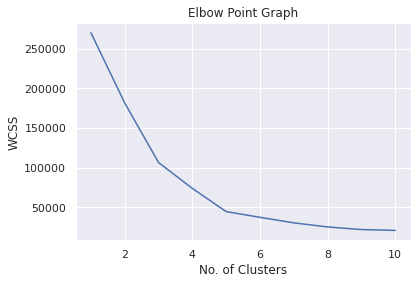

In [ ]:
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Point Graph")
plt.show()

Here we find that there is a sharp bend at cluster number 5 So, we take number of clusters as 5

In [ ]:
#no of centers =5
n=5

Finding out the Clusters which points belong to.

In [ ]:
kmeans=KMeans(n_clusters=n, init='k-means++',random_state=0)
y=kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# **Visualization**

In today’s world, a lot of data is being generated on a daily basis. And sometimes to analyze this data for certain trends, patterns may become difficult if the data is in its raw format. To overcome this data visualization comes into play. Data visualization provides a good, organized pictorial representation of the data which makes it easier to understand, observe, analyze.

Matplotlib is an easy-to-use, low-level data visualization library that is built on NumPy arrays. It consists of various plots like scatter plot, line plot, histogram, etc. Matplotlib provides a lot of flexibility. 

Scatter plots are used to observe relationships between variables and uses dots to represent the relationship between them.

Seaborn is a high-level interface built on top of the Matplotlib. It provides beautiful design styles and color palettes to make more attractive graphs.

Cluster centers for all clusters

Text(0.5, 1.0, 'Cluster Centers')

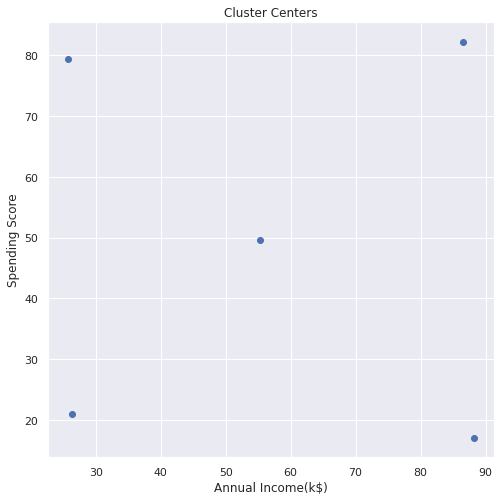

In [ ]:
kmeans.cluster_centers_
plt.figure(figsize=(8,8))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score")
plt.title("Cluster Centers")

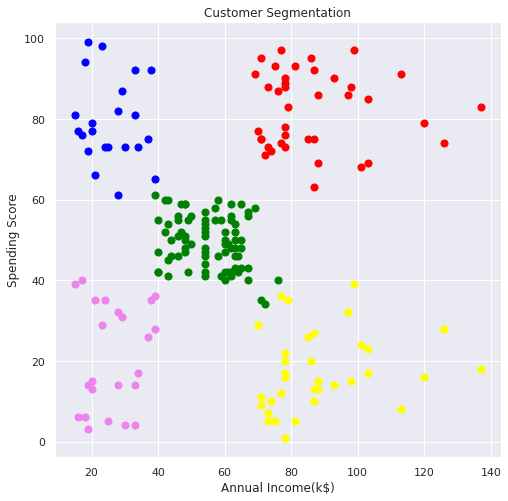

In [ ]:
sns.set()
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='yellow')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='green')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='red')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='blue')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='violet')
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation")
plt.show()